In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
iris = pd.read_csv("iris.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
132,133,6.4,2.8,5.6,2.2,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa


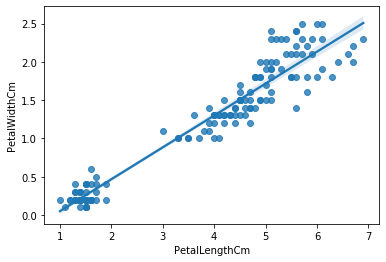

In [2]:
import seaborn
%matplotlib inline
seaborn.regplot(x='PetalLengthCm', y='PetalWidthCm', data=iris)

In [3]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
features = ['PetalLengthCm']
X = iris[features]
y = iris['PetalWidthCm']
print(X.shape, y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)
# y = -0.3665140452167275 + 0.41641913 * x

(150, 1) (150,)
-0.3665140452167275 [0.41641913]


In [4]:
z = 4
z = np.array(z).reshape(-1,1)
model.predict(z)

array([1.29916248])

In [5]:
from sklearn.model_selection import cross_val_score
scores1 = -cross_val_score(lm, X, y, cv=5, scoring='neg_mean_absolute_error')
print(np.mean(scores1))
scores2 = -cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores2))

0.16510575100411423
0.04548097902618274


In [6]:
features = ['PetalLengthCm','SepalLengthCm']
X = iris[features]
y = iris['PetalWidthCm']
print(X.shape, y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)
# y = -0.013852011013003152 + 0.44992999 * x1 + (-0.08190841 * x2)
scores = -cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores))

(150, 2) (150,)
-0.013852011013003152 [ 0.44992999 -0.08190841]
0.046018952575842785


In [7]:
features = ['PetalLengthCm','SepalLengthCm','SepalWidthCm']
X = iris[features]
y = iris['PetalWidthCm']
print(X.shape, y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)
# y = -0.24872358602445455+ 0.52608818 * x1 + (-0.21027133 * x2) + 0.22877721 * x3
scores3 = -cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores3))

(150, 3) (150,)
-0.24872358602445455 [ 0.52608818 -0.21027133  0.22877721]
0.039503660386097386


In [8]:
dt2 = tree.DecisionTreeRegressor()
scores9 = -cross_val_score(dt2,X,y,cv=5,scoring='neg_mean_squared_error')
print(np.mean(scores9))

0.06853333333333332


In [9]:
knn1 = neighbors.KNeighborsRegressor(7,weights='distance')
scores7 = -cross_val_score(knn1,X,y,cv=5,scoring='neg_mean_squared_error')
print(np.mean(scores7))

0.03926815407464672


In [10]:
rf2 = ensemble.RandomForestRegressor(50)
scores11 = -cross_val_score(rf2,X,y,cv=5,scoring='neg_mean_squared_error')
print(np.mean(scores11))

0.04042996210370372


In [11]:
features = ['PetalLengthCm','SepalWidthCm']
X = iris[features]
y = iris['PetalWidthCm']
print(X.shape, y.shape)
model = lm.fit(X,y)
print(model.intercept_,model.coef_)
# y = -0.722106292155031 + 0.42709377 * x1 + 0.10329727 * x2
scores4 = -cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores4))

(150, 2) (150,)
-0.722106292155031 [0.42709377 0.10329727]
0.04428769217674143


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris['Species'])
lm = linear_model.LogisticRegression()
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm']
X = iris[features]
y = le.transform(iris['Species'])
print(y)
scores5 = cross_val_score(lm, X, y, cv=5, scoring='accuracy')
print(np.mean(scores5))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9533333333333334


In [13]:
features=['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']
X=iris[features]
knn2 = neighbors.KNeighborsClassifier(10,weights='uniform')
scores6 = cross_val_score(knn2,X,y,cv=5,scoring='accuracy')
print(np.mean(scores6))

0.9800000000000001


In [14]:
rf1 = ensemble.RandomForestClassifier(150)
scores10 = cross_val_score(rf1,X,y,cv=5,scoring='accuracy')
print(np.mean(scores10))

0.9666666666666668


In [15]:
dt1 = tree.DecisionTreeClassifier()
scores8 = cross_val_score(dt1,X,y,cv=5,scoring='accuracy')
print(np.mean(scores8))

0.9533333333333334
